Name: CHINTAM SRAVAN KUMAR <br>
Registration Number: 21BCE7822 <br>
Branch: Computer Science and Engineering with Specialization Data Analytics <br>
Mail ID: sravan.21bce7822@vitapstudent.ac.in <br>
Evening Batch :6pm-8pm <br>
Campus: VIT-AP <br>
Course: Artificial Intelligence and Machine Learning <br>

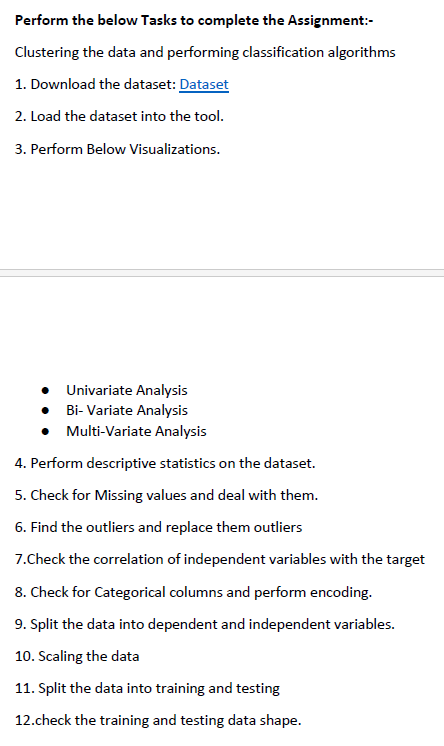

##1,2 Download the Dataset and Load the dataset

**Please Upload penguins_size.csv file before running**

In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [164]:
df=pd.read_csv("/content/penguins_size.csv")

In [165]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


##3.1 Performing Univariate Analysis

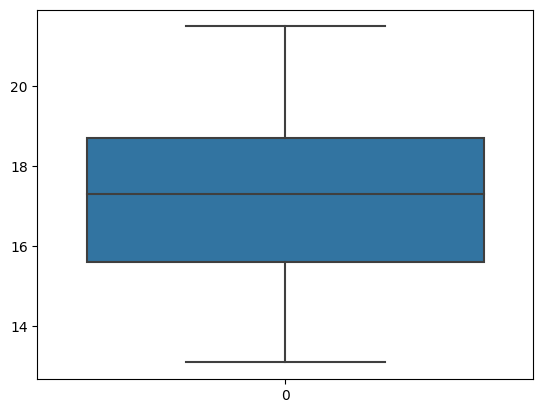

In [166]:
x1=df['culmen_depth_mm']
sns.boxplot(x1)
plt.show()

<ipython-input-167-6a52f4fc936b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x2)


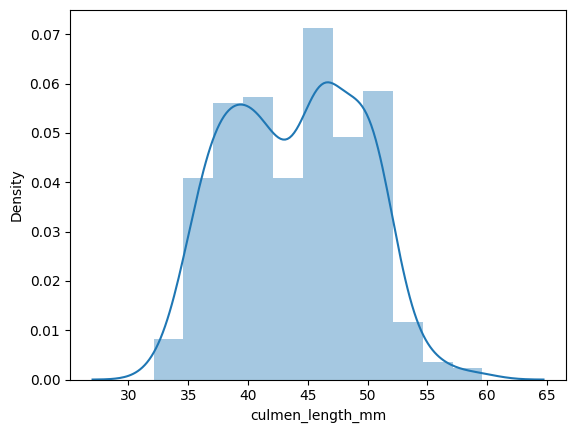

In [167]:
x2=df['culmen_length_mm']
sns.distplot(x2)
plt.show()

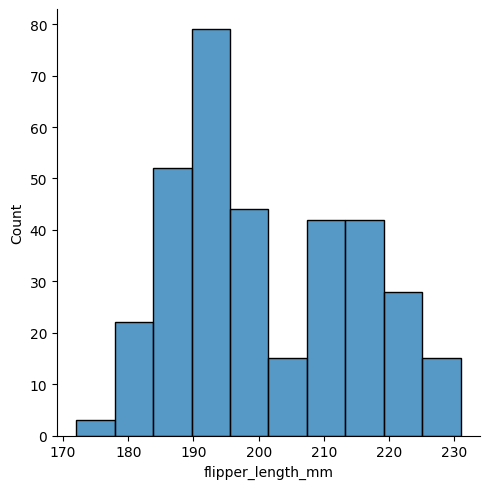

In [168]:
x3=df['flipper_length_mm']
sns.displot(x3)

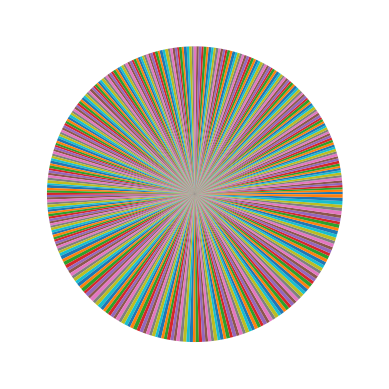

In [169]:
x4=df['body_mass_g'].dropna()
plt.pie(x4)
plt.show()

##3.2 Bi-Variate Analysis

<Axes: xlabel='culmen_depth_mm', ylabel='culmen_length_mm'>

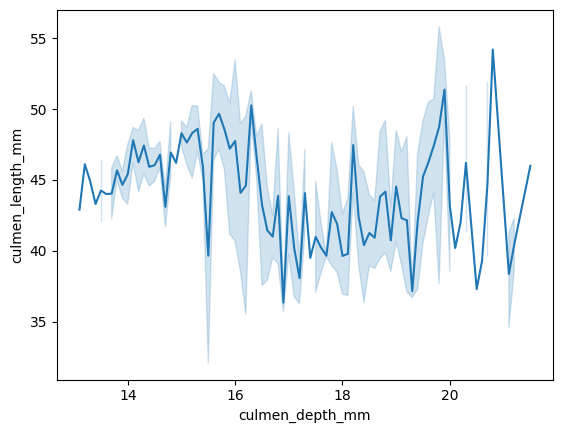

In [170]:
x5=df['culmen_depth_mm']
y5=df['culmen_length_mm']
sns.lineplot(x=x5,y=y5)

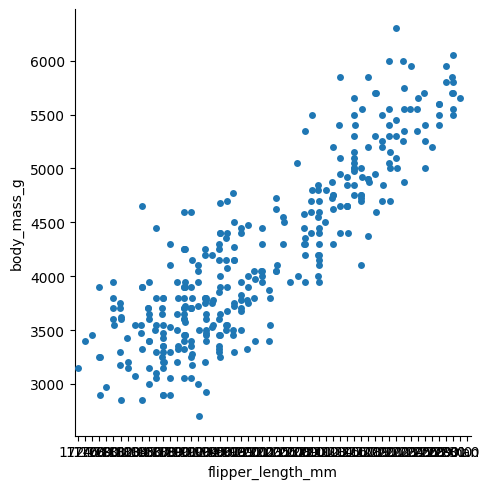

In [171]:
x6=df['flipper_length_mm']
y6=df['body_mass_g']
sns.catplot(x=x6,y=y6)

##3.3 Multi-Variate Analysis

<ipython-input-172-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

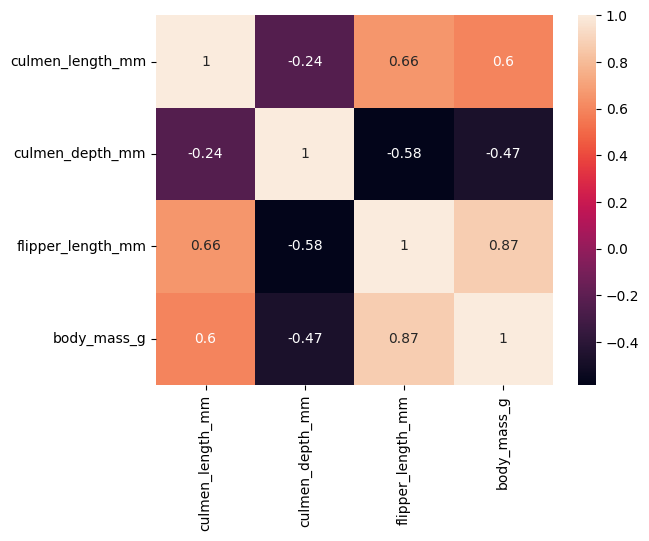

In [172]:
sns.heatmap(df.corr(),annot=True)

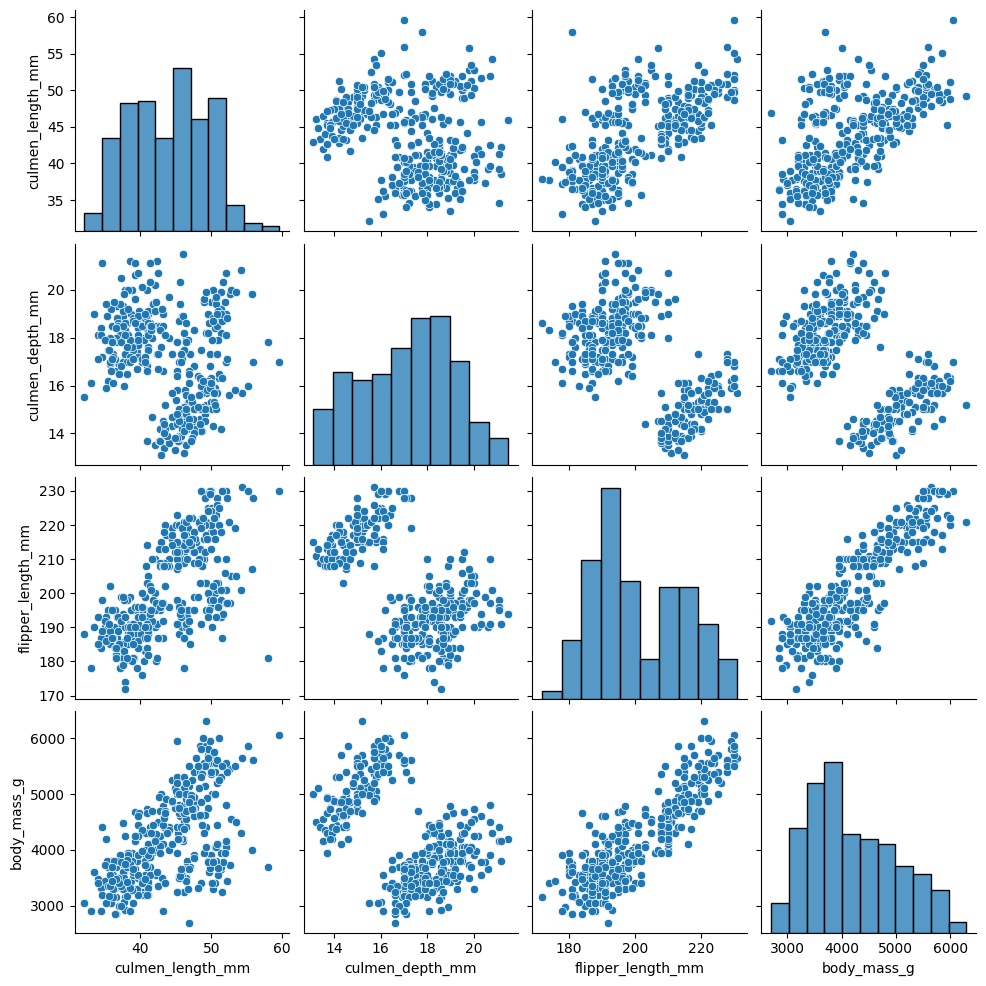

In [173]:
sns.pairplot(df)


##4. Performing Descriptive Statistics

In [174]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


##5. Checking Missing values and dealing with them

In [175]:
df.isnull().any()

species              False
island               False
culmen_length_mm      True
culmen_depth_mm       True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

In [176]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [177]:
# Replacing Categorical null values with mode
print(df["sex"].dropna().mode())
df["sex"].fillna(value="MALE", inplace=True)
df["sex"]=df["sex"].replace('.','MALE')
print(df["sex"].isnull().sum())

0    MALE
Name: sex, dtype: object
0


In [178]:
# Replacing numerical null values with median
df=df.fillna(df.median())
df.isnull().any()

<ipython-input-178-3403a8b795d1>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df=df.fillna(df.median())


species              False
island               False
culmen_length_mm     False
culmen_depth_mm      False
flipper_length_mm    False
body_mass_g          False
sex                  False
dtype: bool

##6. Finding Outliers and Replacing them

<Axes: >

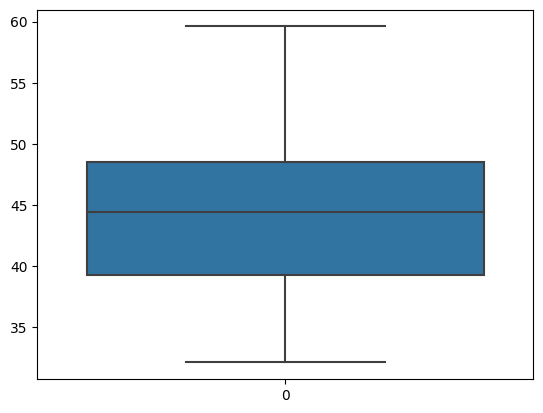

In [179]:
sns.boxplot(df['culmen_length_mm'])
#No outliers

<Axes: >

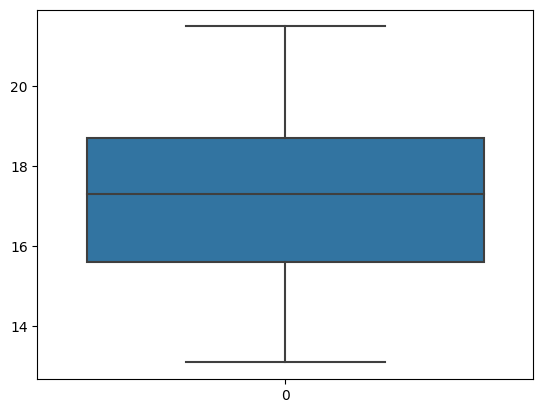

In [180]:
sns.boxplot(df['culmen_depth_mm'])
#No outliers

<Axes: >

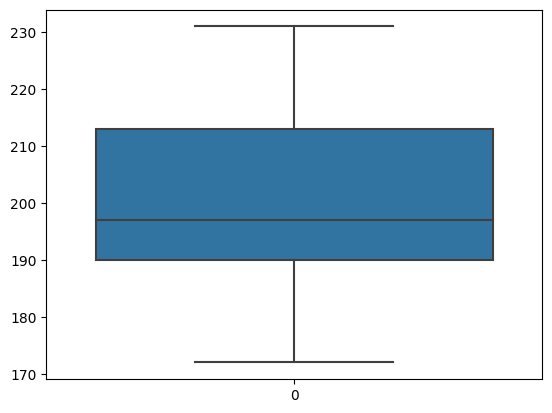

In [181]:
sns.boxplot(df["flipper_length_mm"])
#No outliers

<Axes: >

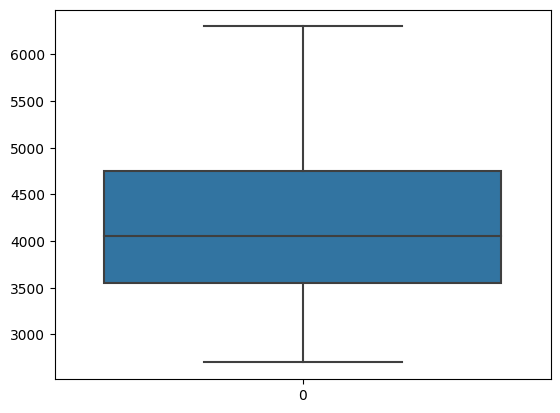

In [182]:
sns.boxplot(df["body_mass_g"])
#No outliers

As there are no outliers so no need replace anything

##7. Checking for Categorical Columns and Performing Label Encoding

In [183]:
df.head()
#Categorical Columns are species island and sex

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.50,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.30,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,44.45,17.3,197.0,4050.0,MALE
4,Adelie,Torgersen,36.70,19.3,193.0,3450.0,FEMALE


In [184]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [185]:
#Performing label encoding on species
df.species=le.fit_transform(df.species)

In [186]:
#Performing label encoding on island
df.island=le.fit_transform(df.island)

In [187]:
#Performing label encoding on sex
df.sex=le.fit_transform(df.sex)

In [188]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10,18.7,181.0,3750.0,1
1,0,2,39.50,17.4,186.0,3800.0,0
2,0,2,40.30,18.0,195.0,3250.0,0
3,0,2,44.45,17.3,197.0,4050.0,1
4,0,2,36.70,19.3,193.0,3450.0,0


##8. Finding correlation with independent variables to the target variable

In [189]:
df.corr().species

species              1.000000
island              -0.635659
culmen_length_mm     0.728706
culmen_depth_mm     -0.741282
flipper_length_mm    0.850819
body_mass_g          0.747547
sex                  0.010240
Name: species, dtype: float64

##9. Spliting data into Dependent and Independent Variables

In [190]:
x=df.drop(columns=['species'],axis=1)
print(x.head())

   island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0       2             39.10             18.7              181.0       3750.0   
1       2             39.50             17.4              186.0       3800.0   
2       2             40.30             18.0              195.0       3250.0   
3       2             44.45             17.3              197.0       4050.0   
4       2             36.70             19.3              193.0       3450.0   

   sex  
0    1  
1    0  
2    0  
3    1  
4    0  


In [191]:
y=df['species']
print(y.head())

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64


##10. Scaling the data

In [192]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [193]:
x_scaled=pd.DataFrame(scale.fit_transform(x),columns=x.columns)
print(x_scaled)

     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0       1.0          0.254545         0.666667           0.152542   
1       1.0          0.269091         0.511905           0.237288   
2       1.0          0.298182         0.583333           0.389831   
3       1.0          0.449091         0.500000           0.423729   
4       1.0          0.167273         0.738095           0.355932   
..      ...               ...              ...                ...   
339     0.0          0.449091         0.500000           0.423729   
340     0.0          0.534545         0.142857           0.728814   
341     0.0          0.665455         0.309524           0.847458   
342     0.0          0.476364         0.202381           0.677966   
343     0.0          0.647273         0.357143           0.694915   

     body_mass_g  sex  
0       0.291667  1.0  
1       0.305556  0.0  
2       0.152778  0.0  
3       0.375000  1.0  
4       0.208333  0.0  
..           ...  ...  
339

##11. Spliting the data into testing data and training data

In [194]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=0)

In [195]:
print(x_train)

     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
219     0.5          0.658182         0.666667           0.440678   
271     0.0          0.596364         0.119048           0.813559   
266     0.0          0.487273         0.095238           0.644068   
335     0.0          0.836364         0.345238           0.983051   
217     0.5          0.636364         0.607143           0.355932   
..      ...               ...              ...                ...   
323     0.0          0.618182         0.226190           0.949153   
192     0.5          0.614545         0.761905           0.644068   
117     1.0          0.189091         0.880952           0.457627   
47      0.5          0.196364         0.690476           0.118644   
172     0.5          0.374545         0.500000           0.152542   

     body_mass_g  sex  
219     0.298611  0.0  
271     0.722222  1.0  
266     0.416667  0.0  
335     0.875000  1.0  
217     0.298611  1.0  
..           ...  ...  
323

In [196]:
print(x_test)

     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
141     0.5          0.309091         0.488095           0.254237   
6       1.0          0.247273         0.559524           0.152542   
60      0.0          0.130909         0.452381           0.220339   
249     0.0          0.650909         0.261905           0.813559   
54      0.0          0.087273         0.595238           0.254237   
..      ...               ...              ...                ...   
81      1.0          0.392727         0.535714           0.406780   
1       1.0          0.269091         0.511905           0.237288   
120     1.0          0.149091         0.488095           0.254237   
8       1.0          0.072727         0.595238           0.355932   
313     0.0          0.632727         0.357143           0.881356   

     body_mass_g  sex  
141     0.215278  1.0  
6       0.256944  0.0  
60      0.125000  0.0  
249     0.791667  1.0  
54      0.055556  0.0  
..           ...  ...  
81 

In [197]:
print(y_train)

219    1
271    2
266    2
335    2
217    1
      ..
323    2
192    1
117    0
47     0
172    1
Name: species, Length: 240, dtype: int64


In [198]:
print(y_test)

141    0
6      0
60     0
249    2
54     0
      ..
81     0
1      0
120    0
8      0
313    2
Name: species, Length: 104, dtype: int64


##12. Checking Training and Testing Data Shape

In [199]:
print("x_train shape",x_train.shape)

x_train shape (240, 6)


In [200]:
print("x_test shape",x_test.shape)

x_test shape (104, 6)


In [201]:
print("y_train shape",y_train.shape)

y_train shape (240,)


In [202]:
print("y_test shape",y_test.shape)

y_test shape (104,)


**Thank You**